# Gross Domestic Product - Data Preparation

### Content:
1. Introduction
2. Data pre-processing:  
    2.1. *Country \ Region \ Income Group*  
    2.2. *GDP Data*  
    2.3. *GDP Growth Rate*  
    2.4. *GDP/Capita*
3. Summary
4. References

### 1. Introduction:
* In this notebook we will use python to pre-process data.  
* We will focus on three different indicators that we will use for analysis in the future.  
* Some visualization will be provided for each data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 2. Data pre-processing:

#### 2.1. Country \ Region \ Income Group:

#### 2.1.1. Loading and pre-processing *Region* data:
We start by loading the GDP metadata to extract the *__Region__* and *__Income Group__* data.

In [2]:
# Load GDP metadata:
metadata_raw = pd.read_csv('GDP_Metadata.csv')

metadata_raw.head(2)

,Code,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,National accounts base year,National accounts reference year,System of National Accounts,SNA price valuation,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,2-alpha code,WB-2 code,Table Name,Short Name
0,AFG,Islamic State of Afghanistan,Low income,South Asia,IDA,HIPC,Afghan afghani,1979,"Demographic and Health Survey, 2015",NaN,2002/03,NaN,Country uses the 1993 System of National Accou...,Value added at basic prices (VAB),NaN,NaN,BPM6,Actual,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,"Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,AF,AF,Afghanistan,Afghanistan
1,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,IBRD,NaN,Albanian lek,2011,"Demographic and Health Survey, 2017/18",NaN,Original chained constant price data are resca...,2010,Country uses the 2008 System of National Accou...,Value added at basic prices (VAB),NaN,Rolling,BPM6,Actual,Special trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,AL,AL,Albania,Albania


In [3]:
# Create new dataframe with selected columns:
country_metadata = metadata_raw.copy()

# Keep columns of interest:
keep_columns1 = ['Short Name', 'Region', 'Income Group']
country_metadata = country_metadata[keep_columns1]

# Rename columns:
country_metadata.rename(columns = {'Short Name' : 'Country'}, inplace = True)

country_metadata.head(3)

,Country,Region,Income Group
0,Afghanistan,South Asia,Low income
1,Albania,Europe & Central Asia,Upper middle income
2,Algeria,Middle East & North Africa,Upper middle income


In [4]:
# Report message - showing number of entries in dataframe:
print(\
'The "country_metadata" dataframe includes {} entires.'\
      .format(country_metadata.shape[0])
     )

The "country_metadata" dataframe includes 263 entires.


#### 2.1.2. Check for null values in our dataframe.

In [5]:
# Count number of values in each column:
count_na = country_metadata.count()
count_na

Country         263
Region          217
Income Group    217
dtype: int64

In [6]:
# Report message - showing number of null values:
print(\
'Null values report:\n\
Region column - {} nulls\n\
Income Group column - {} nulls'\
     .format(count_na[0] - count_na[1], count_na[0] - count_na[2])
     )

Null values report:
Region column - 46 nulls
Income Group column - 46 nulls


*__Region__* and *__Income Group__* categoreis have some null values.  
Let's take a look at these values.

In [7]:
# Show null values of "Income Group" column:
country_metadata[country_metadata['Region'].isna() == True]

,Country,Region,Income Group
217,Arab World,NaN,NaN
218,Caribbean small states,NaN,NaN
219,Central Europe and the Baltics,NaN,NaN
220,Early-demographic dividend,NaN,NaN
221,East Asia & Pacific,NaN,NaN
222,East Asia & Pacific (excluding high income),NaN,NaN
223,East Asia & Pacific (IDA & IBRD),NaN,NaN
224,Euro area,NaN,NaN
225,Europe & Central Asia,NaN,NaN
226,Europe & Central Asia (excluding high income),NaN,NaN


First we will note the columns *__Region__* and *__Income Group__* have the same amount of null values,  
Second, from the table above we can see that where *__Region__* takes a null values *__Income Group__* does as well.  
The entries which have missing values for *__Region__* and *__Income Group__* are not individual countries, they are actually different groups of countires.  
Let's remove these values as they are not essential for our future analysis.

In [8]:
# Keep etries without null values only:
country_metadata = country_metadata[country_metadata['Income Group'].isna() == False]

country_metadata.head(3)

,Country,Region,Income Group
0,Afghanistan,South Asia,Low income
1,Albania,Europe & Central Asia,Upper middle income
2,Algeria,Middle East & North Africa,Upper middle income


In [9]:
# Report message - showing number of null values:
print(\
'After removing none country enries, the "country_metadata" dataframe includes {} entires.'\
      .format(country_metadata.shape[0])
     )

After removing none country enries, the "country_metadata" dataframe includes 217 entires.


#### 1.1.3. Change *__Income Group__* into numerical categorial variable.

In [10]:
# Check values of "Income Group" column:
country_metadata['Income Group'].unique()

array(['Low income', 'Upper middle income', 'High income',
       'Lower middle income'], dtype=object)

In [11]:
# Create a dictionary of numerical values of "Income Group" category:
mapped_categories = {'Low income':0,
                     'Lower middle income':1,
                     'Upper middle income':2,
                     'High income':3
                     }

In [12]:
# Create new "Region" \ "Income Group" dataframe:
country_region_income = country_metadata.copy()

# Change "Income Group" values to their numerical category values:
country_region_income['Income Group'] = country_region_income['Income Group'].map(mapped_categories)

country_region_income.head(3)

,Country,Region,Income Group
0,Afghanistan,South Asia,0
1,Albania,Europe & Central Asia,2
2,Algeria,Middle East & North Africa,2


#### 2.1. GDP Data:
The second dataframe we will pre-process is the *__GDP Data__*.

In [13]:
# Load "GDP Data":
GDP_raw = pd.read_csv('GDP_world_bank.csv')

GDP_raw.head(2)

,Country Name,Country Code,Series Name,Series Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,21.39052841,14.36244146,0.426354793,12.75228708,5.600744661,2.724543365,1.451314655,2.260314205,2.665292046,1.030660058,..
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,438.0760344,543.3030419,591.1623465,641.8720338,637.1650439,613.8563329,578.4663529,547.2281102,556.3021385,520.8966027,..


In [14]:
# Report message - showing number of entries in dataframe:
print(\
'The "country_metadata" dataframe includes {} entires.'\
      .format(GDP_raw.shape[0])
     )

The "country_metadata" dataframe includes 528 entires.


#### 2.1.1 A brief data check.

In [15]:
# Show sammary statistics of "GDP_raw":
GDP_raw.describe()

,Country Name,Country Code,Series Name,Series Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
count,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528
unique,264,264,2,2,499,499,500,499,500,499,498,495,493,475,1
top,Sao Tome and Principe,SYC,GDP per capita (current US$),NY.GDP.PCAP.CD,..,..,..,..,..,..,..,..,..,..,..
freq,2,2,264,264,26,26,25,26,25,26,27,29,32,49,528


Notice that the column *__2019 [YR2019]__* has only one unique value that is repeated 528 times which is the total of entries in the *__GDP_raw__* dataframe.

In [16]:
# Report message - distribution of column "2019 [YR2019]" values:
print(\
'The column "2019 [YR2019]" has {} unique value\
which repeated for each entry out of the {} entries in the datafrmae.'\
      .format(GDP_raw['2019 [YR2019]'].describe()[1], GDP_raw['2019 [YR2019]'].describe()[0])
     )

The column "2019 [YR2019]" has 1 unique valuewhich repeated for each entry out of the 528 entries in the datafrmae.


This unique value of column *__2019 [YR2019]__* is *__".."__*.  
This is probably the way missing values appear in this dataset.  
We will remove column *__2019 [YR2019]__* as it has no information.

In [17]:
# Remove irrelevant  columns:
GDP_raw.drop(['2019 [YR2019]', 'Series Code'], axis = 1, inplace = True)

#### 2.1.2. Pre-process column names:

In [18]:
# Create new "GDP Data" dataframe:
GDP_processed = GDP_raw.copy()

# Change year column names:
original_col_name = GDP_raw.columns[3:] # Get the names of the year columns
new_col_name = list(range(2009,2019)) # Create new year column names

# Replace original column names by new names:
for i,year in enumerate(new_col_name):
    
    # Convert new name to string:
    new_col_name[i] = str(year)
    
    # Replace original name with the new name:
    GDP_processed.rename(columns = {original_col_name[i]:str(year)}, inplace = True)

# Rename other columns and drop country code column:   
GDP_processed.rename(columns = {'Country Name':'Country'}, inplace = True)    
GDP_processed.drop('Country Code', axis = 1, inplace = True)
    
GDP_processed.head(2)

,Country,Series Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,GDP growth (annual %),21.39052841,14.36244146,0.426354793,12.75228708,5.600744661,2.724543365,1.451314655,2.260314205,2.665292046,1.030660058
1,Afghanistan,GDP per capita (current US$),438.0760344,543.3030419,591.1623465,641.8720338,637.1650439,613.8563329,578.4663529,547.2281102,556.3021385,520.8966027


In [19]:
# Check summary statistics:
GDP_processed.describe()

,Country,Series Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,528,528,528,528,528,528,528,528,528,528,528,528
unique,264,2,499,499,500,499,500,499,498,495,493,475
top,Sao Tome and Principe,GDP per capita (current US$),..,..,..,..,..,..,..,..,..,..
freq,2,264,26,26,25,26,25,26,27,29,32,49


#### 2.1.3. Data type check:

In [20]:
GDP_processed.dtypes

Country        object
Series Name    object
2009           object
2010           object
2011           object
2012           object
2013           object
2014           object
2015           object
2016           object
2017           object
2018           object
dtype: object

__Each clolumn's data type is an object, if we want to use these values for future analysis, we must convert them to numerical values with types int or float.__

#### 2.1.4. Null values check:
* We can see that the most common value for year is "..".  
*  This must be the null values in this dataframe.

Let's check if there are any null values in the *__GDP_processed__* dataframe.

In [21]:
print(\
'There are {} NaN values in the "GDP_processed" dataframe.'\
      .format(GDP_processed.isnull().values.sum())
     )

There are 0 NaN values in the "GDP_processed" dataframe.


__As suspected there are no values set as null, which means that nulls are depicted by "..".  
We will fix this by changing these values to null.__

In [22]:
# Get a list of clumns' names:
col_list = GDP_processed.columns

# Change ".." values to NaN:
for i in range(len(col_list)):
    GDP_processed[GDP_processed[col_list[i]] == '..'] = np.NaN

In the next two sections we will split the *__GDP Data__* into two separate dataframe, one for each GDP indicator:
1. GDP growth rate
2. GDP per capita

Create a list of the two indicators that will help process the *__GDP Data__* into two dataframes.

In [23]:
# Create a list of the indicators from "GDP_processed":
GDP_indicators = GDP_processed['Series Name'].unique()

GDP_indicators

array(['GDP growth (annual %)', 'GDP per capita (current US$)', nan],
      dtype=object)

#### 2.2. GDP Growth Rate:

#### 2.2.1. Data Pre-processing:

In [24]:
# Create new "GDP Growth" dataframe:
GDP_growth = GDP_processed.copy()

# Keep GDP Growth values only:
GDP_growth = GDP_growth[GDP_growth['Series Name'] == GDP_indicators[0]]

# Remove unnecessary columns and reset index:
GDP_growth = GDP_growth.drop('Series Name', axis = 1)
GDP_growth.reset_index(drop = True, inplace = True)


# Change values' type to float64 and round values:
for i in range(len(col_list)):
    try:
        GDP_growth = GDP_growth.astype({col_list[i]: 'float64'}).round(2)
    except:
        continue
        

# Crate a list of mean values of each column:
mean_growth = pd.DataFrame(data = GDP_growth.mean(axis = 0).round(2))
mean_growth.reset_index(inplace = True)
mean_growth.rename(columns = {'index':'Year', 0:'Average'}, inplace = True)

# Remove null values
GDP_growth.dropna(axis = 0, inplace = True)


GDP_growth.head()

,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,21.39,14.36,0.43,12.75,5.60,2.72,1.45,2.26,2.67,1.03
1,Albania,3.35,3.71,2.55,1.42,1.00,1.77,2.22,3.31,3.82,4.15
2,Algeria,1.60,3.60,2.90,3.40,2.80,3.80,3.70,3.20,1.30,1.40
3,American Samoa,-4.24,0.44,0.29,-4.39,-2.76,0.94,1.40,-2.77,-5.85,2.18
4,Andorra,-3.69,-5.36,-4.65,-1.62,0.35,2.28,0.84,1.89,1.72,1.63


#### 2.2.2. Summary statistics:  

In [25]:
GDP_growth.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,0.186513,4.586639,3.846807,3.989034,3.420924,3.302983,2.946134,2.895210,3.217311,3.026723
std,5.329424,4.124096,5.851729,8.546874,4.774273,4.309418,4.278670,3.722619,3.731060,3.133503
min,-17.530000,-8.920000,-62.080000,-7.300000,-36.390000,-25.910000,-21.590000,-17.040000,-15.670000,-19.620000
25%,-3.477500,2.102500,1.820000,1.262500,1.830000,1.715000,1.780000,1.587500,1.812500,1.932500
50%,0.550000,4.780000,4.135000,3.505000,3.475000,3.330000,3.080000,3.060000,3.400000,3.065000
75%,3.377500,6.862500,6.110000,5.365000,5.415000,5.055000,4.470000,4.497500,4.697500,4.597500
max,21.390000,25.260000,21.670000,123.140000,34.210000,36.520000,25.160000,28.310000,26.680000,8.610000


* The mean GDP growth rate is between 2011 and 2018 is between 2.8% and 4%.
* The Mean GDP growth rate of 2009 is realy low, perhaps this is due to the 2008 economic crisis.
* In 2010 we can see the highest mean GDP growth rate, which might be due to economic recovery after the 2008 economic crisis.
* The standard deviations range between 3% and 8.6%.

In [26]:
print(\
'There is GDP Growth data for {} countries.'\
      .format(GDP_growth.shape[0])
     )

There is GDP Growth data for 238 countries.


#### 2.2.3. GDP growth rate visualization:  
To visualize the GDP growth rate data we will take three countries for example:
1. China
2. United States
3. Israel

In [27]:
# List of countries to visualize:
country_graph1 = ['China', 'United States', 'Israel']

# List of years:
y1 = list(range(2009,2019))

# Xs list to plot:
Xs1 = []

# Get example countries data and add to "Xs1":
for country in country_graph1:
    data = GDP_growth.loc[GDP_growth['Country'] == country].set_index('Country').transpose()
    x = data[country]
    Xs1.append(x)

# Add the average GDP growth rate to the graph data:    
country_graph1.append('Average')
Xs1.append(mean_growth['Average'])

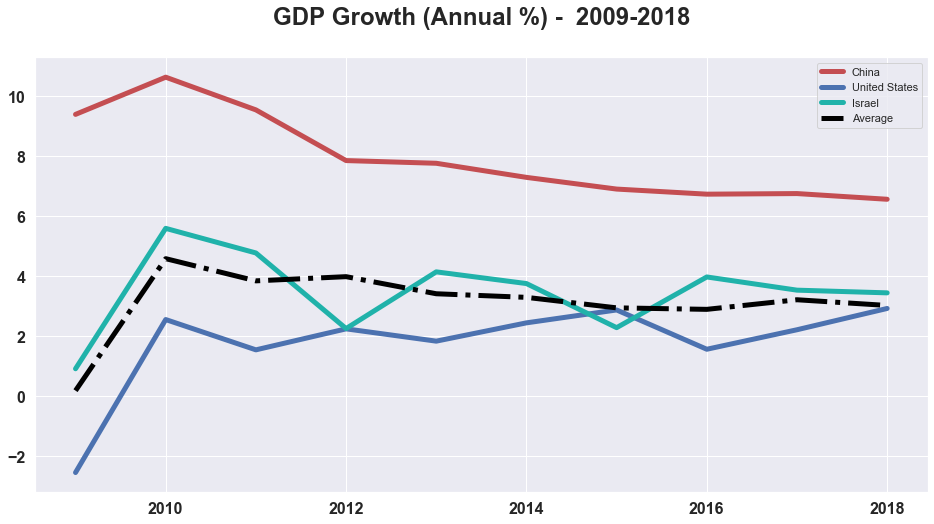

In [28]:
# Set figure size:
plt.figure(figsize = (16, 8))

# Graph color list:
graph_colors = ['r','b' ,'lightseagreen' ,'black']


# Plot graphs:
for i,x in enumerate(Xs1):
    
    # Plot each country:
    if country_graph1[i] != 'Average':
        plt.plot(y1,x,
                 color = graph_colors[i],
                 linewidth = 5,
                 linestyle = '-')
    
    # Plot "Average":
    else:
        plt.plot(y1,x,
                 color = graph_colors[i],
                 linewidth = 5,
                 linestyle = '-.')
    
# Graph title:
plt.title('GDP Growth (Annual %) -  2009-2018\n',
          fontsize = 24,
          fontweight = 'bold')

# Change ticks font:
plt.xticks(fontsize = 16, fontweight = 'bold')
plt.yticks(fontsize = 16, fontweight = 'bold')

# Add graph legend:
plt.legend(country_graph1)  


plt.show()

#### 2.3. GDP Growth Rate:

#### 2.3.1. Data Pre-processing:

In [29]:
# Create new "GDP per capita" dataframe:
GDP_capita = GDP_processed.copy()

# Keep GDP per capita values only:
GDP_capita = GDP_capita[GDP_capita['Series Name'] == GDP_indicators[1]]

# Remove unnecessary columns and reset index:
GDP_capita = GDP_capita.drop('Series Name', axis = 1)
GDP_capita.reset_index(drop = True, inplace = True)


# Change values' type to int64 and round values:
for i in range(len(col_list)):
    try:
        GDP_capita = GDP_capita.astype({col_list[i]: 'float64'}).round().astype({col_list[i]: 'int64'})
    
    except:
        continue
        
        
# Crate a list of mean values of each column:
mean_GDP_capita = pd.DataFrame(data = GDP_capita.mean(axis = 0).round(2))
mean_GDP_capita.reset_index(inplace = True)
mean_GDP_capita.rename(columns = {'index':'Year', 0:'Average'}, inplace = True)

# Remove null values
GDP_capita.dropna(axis = 0, inplace = True)


GDP_capita.head()

,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,438,543,591,642,637,614,578,547,556,521
1,Albania,4114,4094,4437,4248,4413,4579,3953,4124,4533,5269
2,Algeria,3883,4481,5456,5592,5500,5493,4178,3946,4044,4115
3,American Samoa,11961,10271,10294,11569,11505,11507,11843,11697,10823,11467
4,Andorra,43339,39736,41101,38393,40627,42300,36040,37224,39134,42030


#### 2.3.2. Summary statistics:

In [30]:
GDP_capita.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.00000,237.000000,237.000000,237.000000,237.000000
mean,12247.375527,12942.430380,14387.291139,14329.502110,14833.160338,15040.56962,13477.215190,13526.953586,14261.354430,15160.578059
std,18679.442065,19137.978077,21451.619280,20841.085285,21979.397909,22515.24579,19760.102206,19966.260962,20658.509389,22293.576604
min,212.000000,234.000000,250.000000,252.000000,257.000000,275.00000,306.000000,282.000000,293.000000,272.000000
25%,1349.000000,1553.000000,1738.000000,1820.000000,1966.000000,2030.00000,1996.000000,2049.000000,2001.000000,2036.000000
50%,4316.000000,4921.000000,5650.000000,6110.000000,6640.000000,6467.00000,5840.000000,5651.000000,6132.000000,6385.000000
75%,14514.000000,13924.000000,14637.000000,15435.000000,16007.000000,16489.00000,15614.000000,15198.000000,16078.000000,17130.000000
max,154762.000000,150585.000000,168786.000000,157516.000000,177593.000000,189171.00000,165938.000000,169916.000000,167102.000000,185741.000000


* From the minimum and maxium values of each year we can learn that there is a greate variation between countreis' GDP per capita.
* The mean GDP per capita does not vary much between each year.
* Regarding the standard deviations, we can see that they change between years but there is no trend.

In [31]:
print(\
'There is GDP/Capita data for {} countries.'\
      .format(GDP_capita.shape[0])
     )

There is GDP/Capita data for 237 countries.


#### 2.2.3. GDP per capita visualization:  
To visualize the GDP per capita rate data we will take three countries for example:
1. China
2. United States
3. Israel

In [32]:
# List of countries to visualize:
country_graph2 = ['China', 'United States', 'Israel']

# List of years:
y2 = list(range(2009,2019))

# Xs list to plot:
Xs2 = []

# Get example countries data and add to "Xs2":
for country in country_graph2:
    data = GDP_capita.loc[GDP_capita['Country'] == country].set_index('Country').transpose()
    x = data[country]
    Xs2.append(x)
    
# Add the average GDP per capita to the graph data:    
country_graph2.append('Average')
Xs2.append(mean_GDP_capita['Average'])

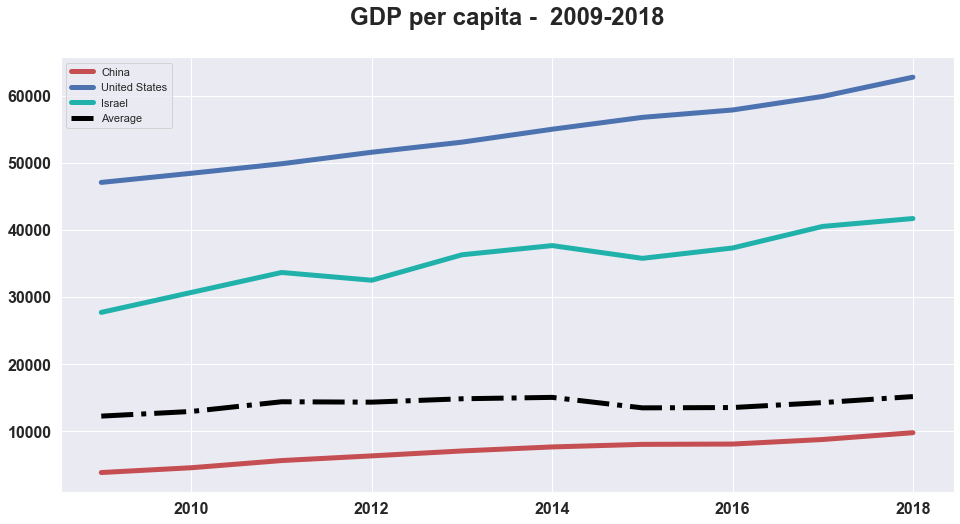

In [33]:
# Set figure size:
plt.figure(figsize = (16, 8))

# Graph color list:
graph_colors = ['r','b' ,'lightseagreen' ,'black']

# Plot graphs:
for i,x in enumerate(Xs2):
    
    # Plot each country:
    if country_graph2[i] != 'Average':
        plt.plot(y2,x,
                 color = graph_colors[i],
                 linewidth = 5,
                 linestyle = '-')
    
    # Plot "Average":
    else:
        plt.plot(y2,x,
                 color = graph_colors[i],
                 linewidth = 5,
                 linestyle = '-.')
        
# Graph title:
plt.title('GDP per capita -  2009-2018\n',
          fontsize = 24,
          fontweight = 'bold')

# Change ticks font:
plt.xticks(fontsize = 16, fontweight = 'bold')
plt.yticks(fontsize = 16, fontweight = 'bold')


# Add graph legend:
plt.legend(country_graph2)


plt.show()

### 3. Summary:

Overall, in this notebook we:
1. We have pre-processed three dataframe:  
    1) *__country_region_income__*  
    2) *__GDP_growth__*  
    3) *__GDP_capita__* 
2. We visualized the data for some counries with simple graphs.

In [34]:
# Print a report of the three dataframes in this notebook:
print(\
'There are three dataframes to combine:\n\
  1) "country_region_income" - total of {} countries\n\
  2) "GDP_growth" - total of {} countries\n\
  3) "GDP_capita" - total of {} countreis'\
.format(country_region_income.shape[0], GDP_growth.shape[0], GDP_capita.shape[0])
     )

There are three dataframes to combine:
  1) "country_region_income" - total of 217 countries
  2) "GDP_growth" - total of 238 countries
  3) "GDP_capita" - total of 237 countreis


Let's export the *__GDP_growth__* dataframe as a csv file for future snalysis.

Export the *__country_region_income__* dataframe as a csv file for future snalysis.

In [35]:
country_region_income.to_csv(r'Country_Region_Income.csv', index = False)

Export the *__GDP_growth__* dataframe as a csv file for future snalysis.

In [36]:
GDP_growth.to_csv(r'GDP_Growth.csv', index = False)

Export the *__GDP_capita__* dataframe as a csv file for future snalysis.

In [37]:
GDP_capita.to_csv(r'GDP_Capita.csv', index = False)

__Thank you for taking your time to read through this!__

### 4. References

World Bank, World Development Indicators. (n.d.-b). *GDP per capita (current US$) [Data File]*. Retrieved December 28, 2019, from The World Bank: https://databank.worldbank.org/source/world-development-indicators